<a href="https://colab.research.google.com/github/koushik1904/Natural-language-processing-NLB-/blob/main/NLP_LAB_10_2403a52057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load embedding model
!pip install gensim
import gensim.downloader as api

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.manifold import TSNE


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 62.2 MB/s eta 0:00:00


In [3]:
# Import gensim downloader to load pre-trained word embedding models
import gensim.downloader as api

# Import pandas to read CSV dataset
import pandas as pd

# Import numpy to handle numerical arrays and vectors
import numpy as np

# Import matplotlib to visualize embeddings in 2D
import matplotlib.pyplot as plt

# Import TSNE from sklearn for dimensionality reduction
from sklearn.manifold import TSNE


In [4]:
# Load Google's pre-trained Word2Vec model (300-dimensional vectors)
model = api.load("word2vec-google-news-300")

# Print total number of words in the vocabulary
print("Vocabulary Size:", len(model.key_to_index))

# Display one example vector to understand its structure
print("\nExample vector for word 'king':")
print(model["king"])  # This prints a 300-dimensional numeric vector


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vocabulary Size: 3000000

Example vector for word 'king':
[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.597656

In [6]:
# Load the uploaded CSV dataset containing words
df = pd.read_csv("/content/word_list_tsne.csv")

# Display first few rows to check structure
print(df.head())

# Print column names to confirm correct column
print("Columns in dataset:", df.columns)

# Extract words from column (change column name if needed)
words = df[df.columns[0]].tolist()

# Print total words loaded from dataset
print("Total words from dataset:", len(words))


       word
0       dog
1       cat
2      lion
3     tiger
4  elephant
Columns in dataset: Index(['word'], dtype='object')
Total words from dataset: 39


In [7]:
# Create empty lists to store valid words and their vectors
vectors = []
valid_words = []

# Loop through each word from dataset
for word in words:

    # Check if word exists in embedding vocabulary
    if word in model:

        # Append its vector representation
        vectors.append(model[word])

        # Store valid word
        valid_words.append(word)

# Convert list of vectors into numpy array
vectors = np.array(vectors)

# Print number of valid words found
print("Valid words found in model:", len(valid_words))


Valid words found in model: 39


In [8]:
# Create TSNE object
tsne = TSNE(
    n_components=2,      # Reduce dimensions to 2
    random_state=42,     # Fix randomness for reproducibility
    perplexity=5         # Controls balance between local and global structure
)

# Apply t-SNE on high-dimensional vectors
reduced_vectors = tsne.fit_transform(vectors)

# Print new shape after reduction
print("Shape after reduction:", reduced_vectors.shape)


Shape after reduction: (39, 2)


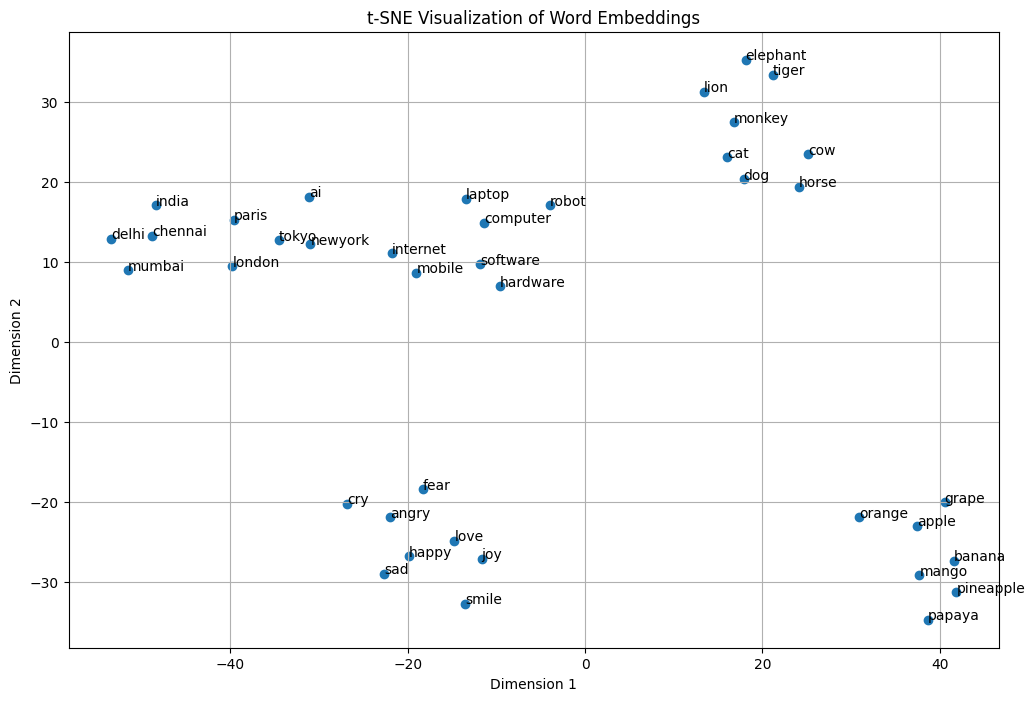

In [9]:
# Create figure with larger size for clarity
plt.figure(figsize=(12, 8))

# Plot scatter points using reduced 2D vectors
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

# Annotate each point with its word label
for i, word in enumerate(valid_words):

    plt.annotate(
        word,                                   # Word label
        (reduced_vectors[i, 0], reduced_vectors[i, 1])  # Coordinates
    )

# Add title and axis labels
plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()
